# 01 Discovery: European Soccer Database

Discovery notebook used to explore the European Soccer database from Kaggle.

## Connect to the database and list the tables and columns

In [2]:
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# path to the database file - update as needed
db_path = '../data/database.sqlite'

conn = sqlite3.connect(db_path)

# Use the metadata table "sqlite_master" to list the tables in this database
# Ignore any internal tables (they start with 'sqlite')
tables = pd.read_sql("""SELECT name 
                        FROM sqlite_master 
                        WHERE type='table'
                        AND name not like 'sqlite%'; """, conn)

tables

,name
0,Player_Attributes
1,Player
2,Match
3,League
4,Country
5,Team
6,Team_Attributes


In [34]:
# Use the metadata table 'sqlite_master' and the built-in function 
# 'pragma_table_info' to get the columns in the Player_Attributes table

for name in tables['name']:

    sql = ("""
        WITH all_tables AS 
            (SELECT name 
            FROM sqlite_master 
            WHERE type = 'table' 
            AND name = ?)
        SELECT at.name table_name, pti.* 
        FROM all_tables at 
        INNER JOIN pragma_table_info(at.name) pti 
        ORDER BY table_name;"""
    )
    args = [name]

    columns = pd.read_sql(sql=sql, con=conn, params=args)

    print(columns, '\n')

           table_name  cid                 name     type  notnull dflt_value  \
0   Player_Attributes    0                   id  INTEGER        0       None   
1   Player_Attributes    1   player_fifa_api_id  INTEGER        0       None   
2   Player_Attributes    2        player_api_id  INTEGER        0       None   
3   Player_Attributes    3                 date     TEXT        0       None   
4   Player_Attributes    4       overall_rating  INTEGER        0       None   
5   Player_Attributes    5            potential  INTEGER        0       None   
6   Player_Attributes    6       preferred_foot     TEXT        0       None   
7   Player_Attributes    7  attacking_work_rate     TEXT        0       None   
8   Player_Attributes    8  defensive_work_rate     TEXT        0       None   
9   Player_Attributes    9             crossing  INTEGER        0       None   
10  Player_Attributes   10            finishing  INTEGER        0       None   
11  Player_Attributes   11     heading_a

## Explore some of the categorical and numeric fields

### Overall Rating field

In [30]:
overall_rating_summary = pd.read_sql("""SELECT 
                                        MIN(overall_rating) AS 'Min Rating', 
                                        MAX(overall_rating) AS 'Max Rating', 
                                        ROUND(AVG(overall_rating),0) AS 'Average Rating'
                                    FROM Player_Attributes""", conn)

overall_rating_summary

,Min Rating,Max Rating,Average Rating
0,33,94,69.0


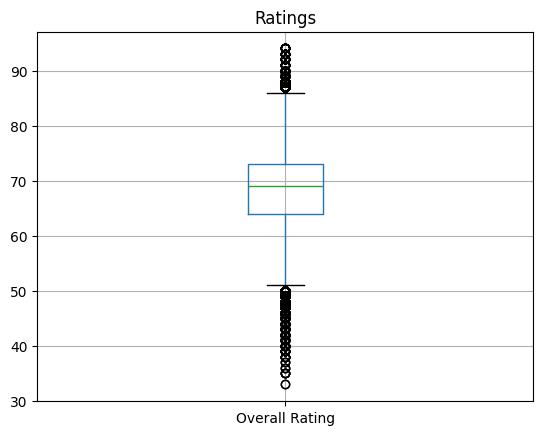

In [31]:
overall_ratings = pd.read_sql("""SELECT overall_rating AS 'Overall Rating' FROM Player_Attributes""", conn)
or_plt = overall_ratings.boxplot(column='Overall Rating', )
or_plt.plot()
plt.title("Ratings")
plt.show()

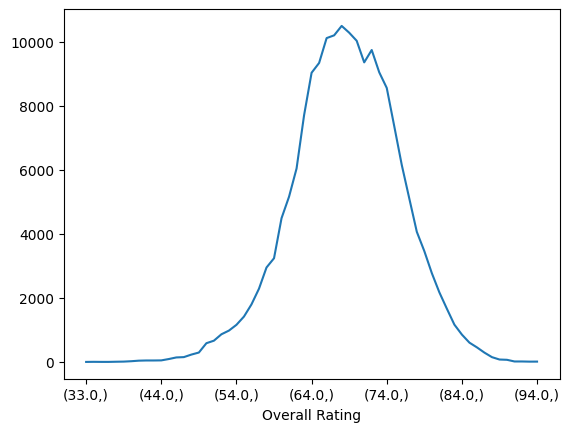

In [57]:
vc_plt = overall_ratings.value_counts().sort_index().plot()
plt.plot()
plt.show()

###  Preferred Foot field

In [32]:
preferred_foot = pd.read_sql("""SELECT 
                                    preferred_foot as 'Preferred Foot', 
                                    COUNT(1) as 'Number of Players' 
                                FROM Player_Attributes
                                GROUP BY preferred_foot""", 
                                conn, 
                                index_col='Preferred Foot')
preferred_foot

,Number of Players
Preferred Foot,
None,836
left,44733
right,138409


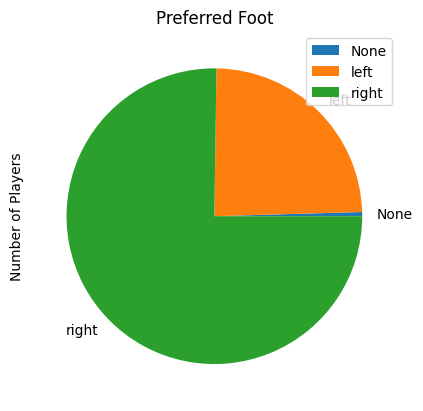

In [33]:
preferred_foot.plot(kind='pie', 
                    y='Number of Players', 
                    title='Preferred Foot')
plt.plot()
plt.show()